In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

Обучим дерево решений с помощью sklearn

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
X = df.data
features = df.feature_names
y = df.target

df = pd.DataFrame(X, columns=features)
df['target'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
features = ['HouseAge', 'Population']
df = df[features + ['target']]
df = df.head(5)
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [7]:
X = df[features]
y = df['target']

### Обучение дерева

Инициализируем дерево решений для задачи регрессии. По признакам модель будет запоминать закономерности, которые ведут к изменению стоимости дома.

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.4, 0.9, 'Population <= 409.0\nsquared_error = 0.177\nsamples = 5\nvalue = 3.693'),
 Text(0.2, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 4.526'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'Population <= 1483.0\nsquared_error = 0.005\nsamples = 4\nvalue = 3.485'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'Population <= 527.0\nsquared_error = 0.002\nsamples = 3\nvalue = 3.452'),
 Text(0.2, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 3.521'),
 Text(0.6, 0.3, 'Population <= 561.5\nsquared_error = 0.0\nsamples = 2\nvalue = 3.418'),
 Text(0.4, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.413'),
 Text(0.8, 0.1, 'squared_error = -0.0\nsamples = 1\nvalue = 3.422'),
 Text(0.8, 0.5, 'squared_error = -0.0\nsamples = 1\nvalue = 3.585')]

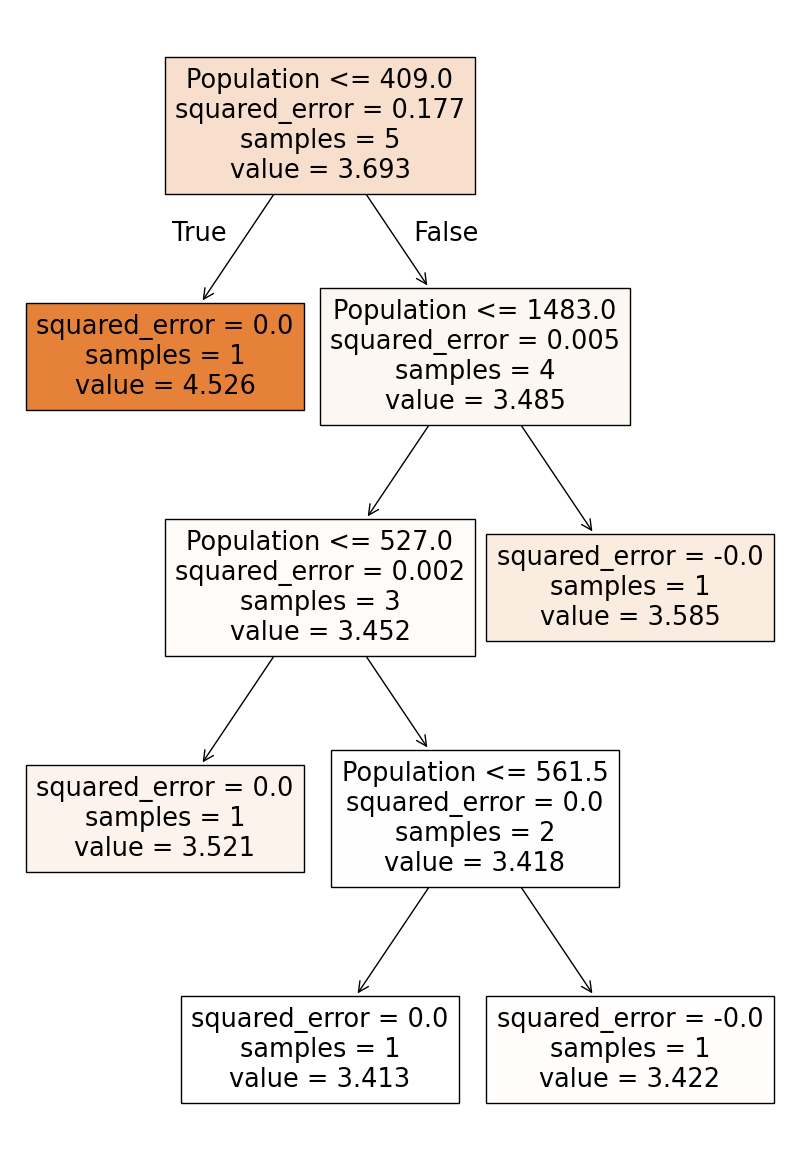

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,15))
plot_tree(tree, feature_names=features, filled=True)

### Рассмотрим подробнее, как дерево решений обучилось

In [11]:
y

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

Средне-квадратичная ошибка показывает усредненное отклонение от истинных значений, возведенное в квадрат. 

In [12]:
def mse(true, pred):
    return np.mean(np.square(true - pred))

[Text(0.4, 0.8333333333333334, 'Population <= 409.0\nsquared_error = 0.177\nsamples = 5\nvalue = 3.693'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 4.526'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Population <= 1483.0\nsquared_error = 0.005\nsamples = 4\nvalue = 3.485'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.8, 0.16666666666666666, '\n  (...)  \n')]

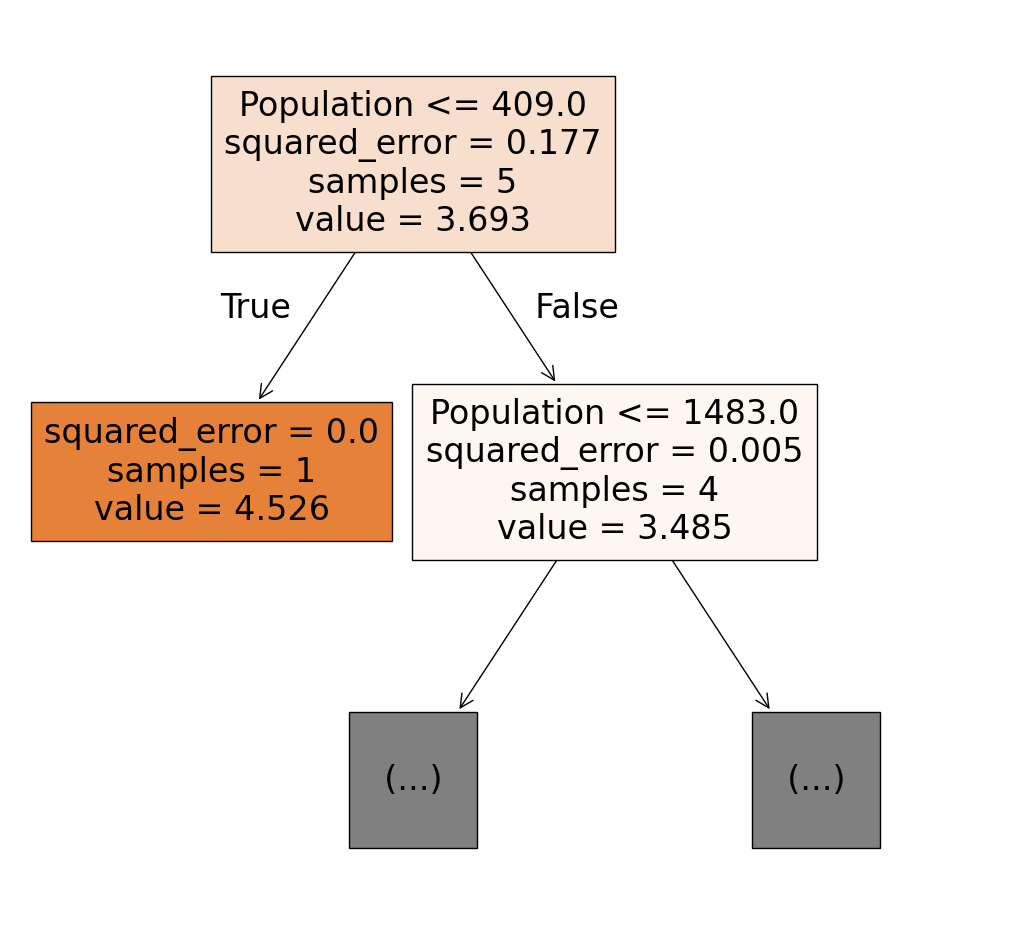

In [13]:
plt.figure(figsize=(13, 12))
plot_tree(tree, feature_names=features, filled=True, max_depth=1)

### Рассмотрим вопрос Population <= 409

In [14]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


В левой ячейке объекты(1), которые удовлетворяют условию <=409, в правой(4) - которые не удовлетворяют

In [15]:
df_left = df[df.Population <= 409]
df_right = df[~(df.Population <= 409)]
df_left, df_right

(   HouseAge  Population  target
 0      41.0       322.0   4.526,
    HouseAge  Population  target
 1      21.0      2401.0   3.585
 2      52.0       496.0   3.521
 3      52.0       558.0   3.413
 4      52.0       565.0   3.422)

В корневом узле можно посчитать среднее предсказание и  средне-квадратичную ошибку. В нем находятся все 5 объектов. 
$$pred = \frac{Сумма|значений|объектов}{Количество|объектов}

In [16]:
print(f'Среднее предсказание в корневом узле: {df['target'].mean()}')

Среднее предсказание в корневом узле: 3.6934000000000005


$$MSE = \frac{Квадрат|разности|pred|и|target}{Количество|объектов}

In [17]:
mse_root = mse(df['target'], df['target'].mean())
print(f'Среднеквадратичная ошибка в корневом узле: {mse_root}')

Среднеквадратичная ошибка в корневом узле: 0.17739543999999993


Теперь посмотрим на MSE в узлах

In [18]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 4.526
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.0


In [19]:
print(f"Среднее предсказание в правой подвыборке после вопроса Population <= 409 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в правой подвыборке после вопроса Population <= 409 равна {mse_right}")

Среднее предсказание в правой подвыборке после вопроса Population <= 409 равно 3.48525
Среднеквадратичная ошибка в правой подвыборке после вопроса Population <= 409 равна 0.005112187499999999


Прирост информации (IG) - формула, по которой можно понять, насколько вопрос, по которому разбили узел хорош. Он считается по формуле $$IG = MSE_{root} - (\frac{n_{left}}{n}MSE_{left} + \frac{n_{right}}{n}MSE_{right})$$

In [20]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left/n) * mse_left + (n_right/n) * mse_right)
ig

np.float64(0.17330568999999993)

Если бы мы взяли разбиение по признаку HouseAge, то прирост информации получился меньше. Поэтому модель взяла разбиение именно по условию Population <= 409

### Процесс построения дерева

Чтобы получить самый полезный вопрос, дерево проходится по всем уникальным значениям в нем и выбирает самый информативный

In [21]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [22]:
split_values = sorted(df.HouseAge.unique())
split_values

[np.float64(21.0), np.float64(41.0), np.float64(52.0)]

In [23]:
def get_inf_gain(df, feature, split):
    df_left, df_right = df[df[feature] <= split], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root =  mse(df['target'], df['target'].mean())
    mse_left =  mse(df_left['target'], df_left['target'].mean())
    mse_left =  mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left/n) * mse_left + (n_right/n) * mse_right)
    print(f'Прирост информации при вопросе {feature} <= {split} равен {ig}')
    return ig

In [24]:
inf_gains = {}

feature = 'HouseAge'
for split in split_values[:-1]:
    inf_gains[f'{feature} <= {split}'] = get_inf_gain(df, feature, split)
split_values = sorted(df.Population.unique())
split_values

Прирост информации при вопросе HouseAge <= 21.0 равен 0.12969123999999993
Прирост информации при вопросе HouseAge <= 41.0 равен 0.17337052749999993


[np.float64(322.0),
 np.float64(496.0),
 np.float64(558.0),
 np.float64(565.0),
 np.float64(2401.0)]

In [25]:
feature = 'Population'
for split in split_values[:-1]:
    inf_gains[f'{feature} <= {split}'] = get_inf_gain(df, feature, split)
max(inf_gains, key=inf_gains.get)

Прирост информации при вопросе Population <= 322.0 равен 0.17228325249999993
Прирост информации при вопросе Population <= 496.0 равен 0.17182883861111103
Прирост информации при вопросе Population <= 558.0 равен 0.17136521499999993
Прирост информации при вопросе Population <= 565.0 равен 0.17637300249999993


'Population <= 565.0'

In [26]:
display(df[(df['Population'] <= 322)], df[~(df['Population'] <= 322)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


### Итог

Дерево решений перебирает все возможные значения каждого признака и выбирает то разбиение, которое даёт максимальный прирост информации. В нашем случае Population <= 409, HouseAge <= 41

Алгоритм дерева работы дерева решений:
1. Поиск лучшего вопроса для разбиения данных
2. Разделение объектов на двве группы по этому вопросу
3. Повтороение 1 и 2 пунктов для каждой подвыборки
4. Остановка когда достигнут критерий остановки